In [1]:
###### import tomosipo as ts
import numpy as np
import pickle
import mrcfile
import numpy as np
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
import os
import matplotlib.pyplot as plt
import astra
from tomosipo.geometry.parallel_vec import *
from scipy.ndimage import zoom

%matplotlib inline


In [2]:
data_name = '3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean'
os.makedirs(f'./data/{data_name}', exist_ok = True)

with open(f'./data/{data_name}/images.pkl', 'rb') as f:
    new_projection = pickle.load( f)
          
with open(f'./data/{data_name}/angles.pkl', 'rb') as f:
    angles2 = pickle.load( f)
print(angles2[:5])
with open(f'./data/{data_name}/orientation_matrix.pkl', 'rb') as f:
    Orientation_Vectors = pickle.load(f)
print(Orientation_Vectors[:5]) 
with open(f'./data/{data_name}/indexs.pkl', 'rb') as f:
    indexs = pickle.load(f)
print('indexs',indexs[:10])     
with open(f'./data/{data_name}/mean_subtracted_strcut.pkl', 'rb') as f:
    mean_subtracted_strcut = pickle.load(f)

[[2.28411239 0.59341195 4.10990097]
 [2.05058716 0.90757121 0.37629299]
 [6.10777989 1.46607657 3.30704952]
 [0.75984672 0.38397244 3.59729795]
 [5.85749933 0.57595865 1.49051153]]
[[ 0.31689136 -0.46073482  0.82903757  0.          0.          0.
   0.93046968 -0.01842978 -0.36590506  0.18386418  0.88734648  0.42285954]
 [-0.73287621  0.28957453  0.61566148  0.          0.          0.
  -0.59028615 -0.72059345 -0.36374075  0.33831157 -0.62999339  0.69903763]
 [ 0.98093992 -0.16380071  0.10452846  0.          0.          0.
  -0.13026082 -0.15517215  0.97926182 -0.14418388 -0.97421298 -0.17355138]
 [ 0.33637831 -0.16486277  0.92718385  0.          0.          0.
  -0.3004189   0.91433001  0.2715679  -0.89252345 -0.3698931   0.25803289]
 [-0.04367928  0.5428847   0.83867057  0.          0.          0.
   0.4728731  -0.72824598  0.49603309  0.88004725  0.41825112 -0.22490631]]
indexs [3, 0, 2, 0, 2, 2, 0, 2, 4, 3]


In [3]:
print(new_projection.shape)
ProjSize = 34
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
pg = ts.from_astra(Proj_geom)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(34, 34, 34)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)

print(pg.ray_dir[:5])
"""
print(pg.det_v[:5])
print(pg.det_u[:5])
print(Orientation_Vectors[:5])
print(pg[:5])
"""


(9453, 34, 34)
[[ 0.82903757 -0.46073482  0.31689136]
 [ 0.61566148  0.28957453 -0.73287621]
 [ 0.10452846 -0.16380071  0.98093992]
 [ 0.92718385 -0.16486277  0.33637831]
 [ 0.83867057  0.5428847  -0.04367928]]


'\nprint(pg.det_v[:5])\nprint(pg.det_u[:5])\nprint(Orientation_Vectors[:5])\nprint(pg[:5])\n'

(9453, 34, 34)
1092.0038957595825 sec
0 batch 1 iteration
generated


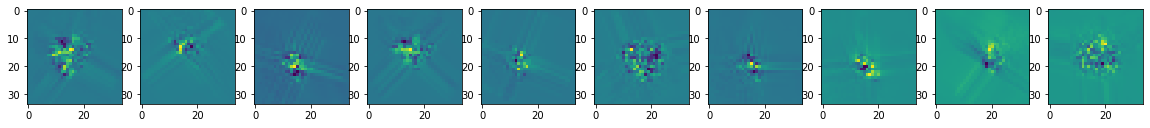

real


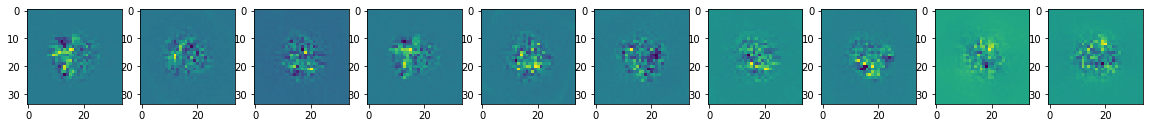

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 7.078371
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.939262
[t-SNE] KL divergence after 1000 iterations: 0.586630
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([714.8331, 616.2236, 675.5047, 778.1243, 597.0910],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


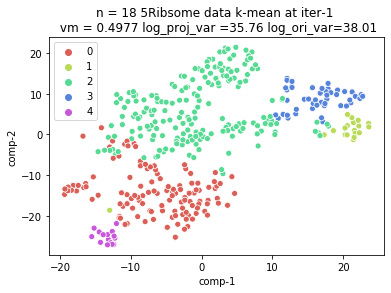

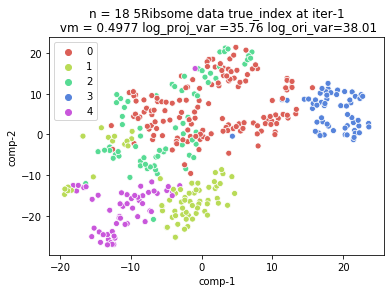

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1067.154765367508 sec
0 batch 2 iteration
generated


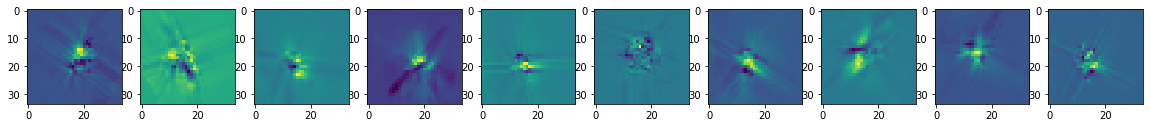

real


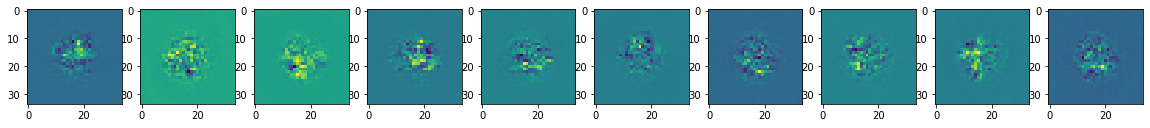

1060.8773181438446 sec
0 batch 3 iteration
generated


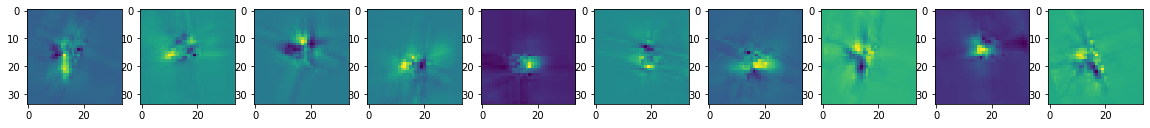

real


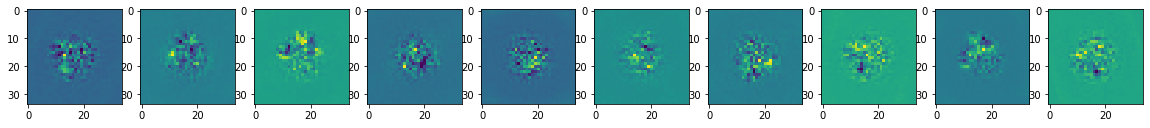

1099.3718256950378 sec
0 batch 4 iteration
generated


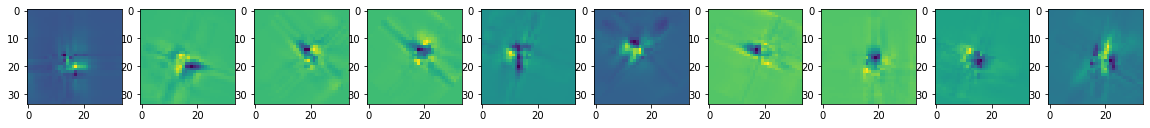

real


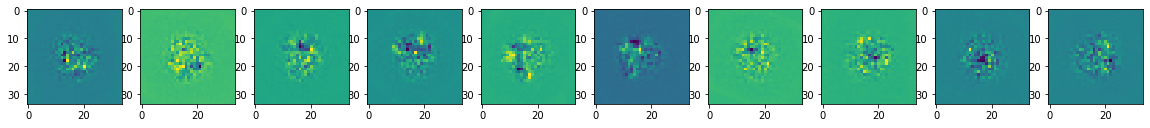

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.738477
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.817986
[t-SNE] KL divergence after 1000 iterations: 0.372888
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([1145.9332,  979.8384, 1087.2377, 1250.7784,  958.9931],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


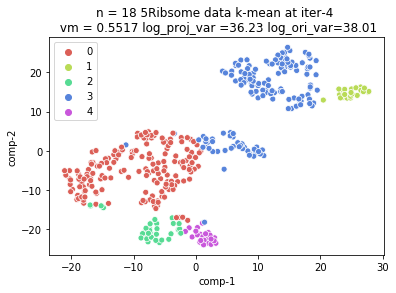

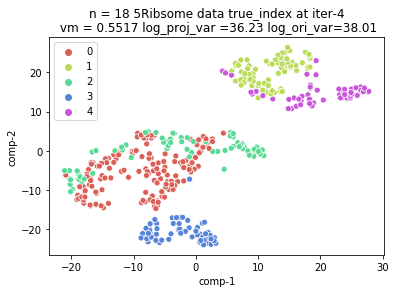

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1088.2083077430725 sec
0 batch 5 iteration
generated


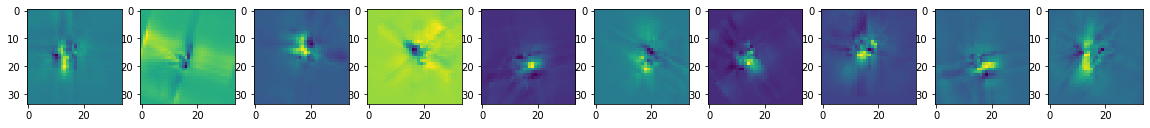

real


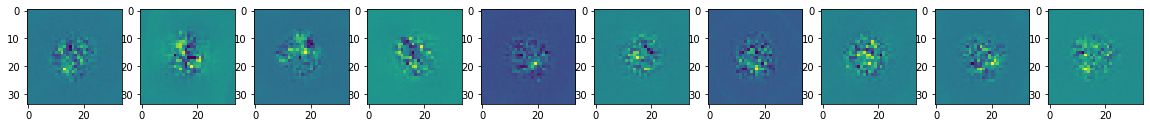

1109.370704650879 sec
0 batch 6 iteration
generated


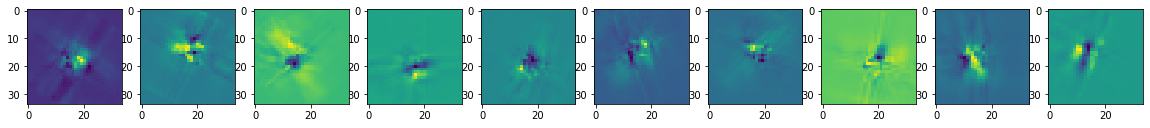

real


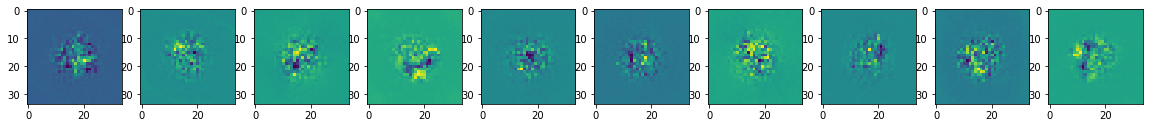

1095.4500193595886 sec
0 batch 7 iteration
generated


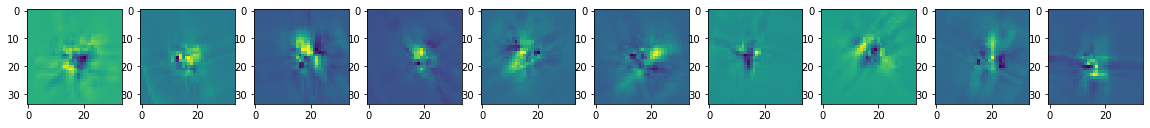

real


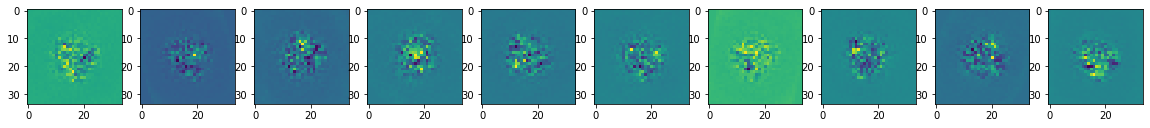

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.262551
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.980873
[t-SNE] KL divergence after 1000 iterations: 0.343211
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([ 994.0870,  824.5810,  944.1512, 1082.0935,  804.8506],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


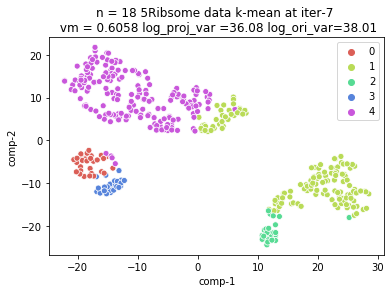

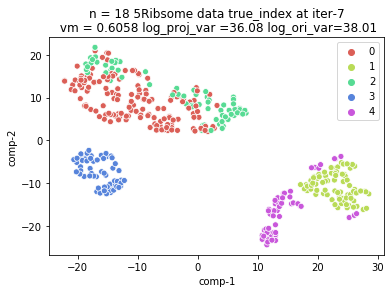

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1085.8490059375763 sec
0 batch 8 iteration
generated


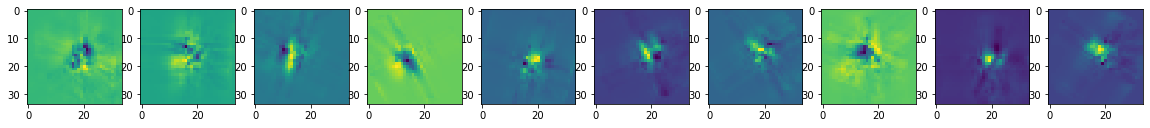

real


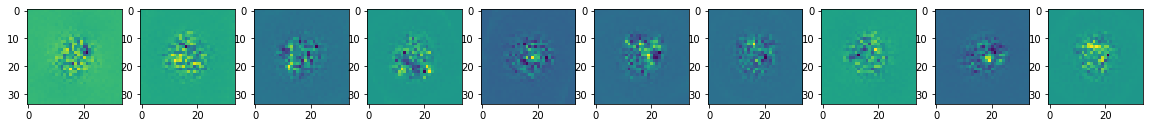

1103.2444112300873 sec
0 batch 9 iteration
generated


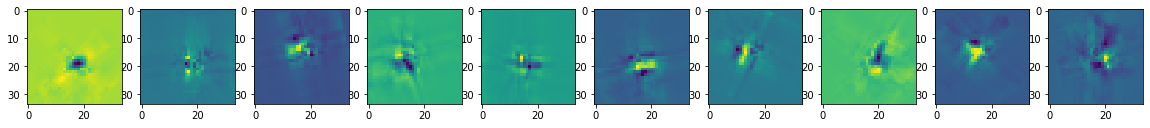

real


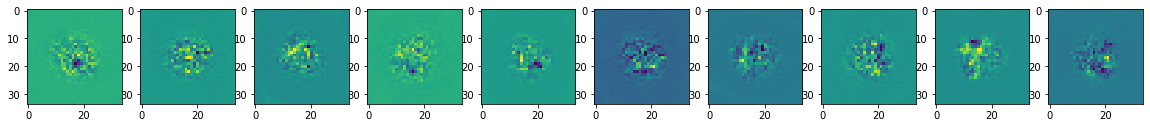

1099.6429333686829 sec
0 batch 10 iteration
generated


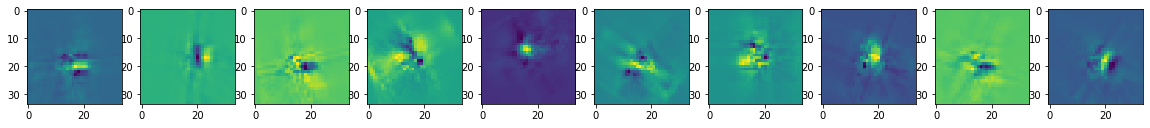

real


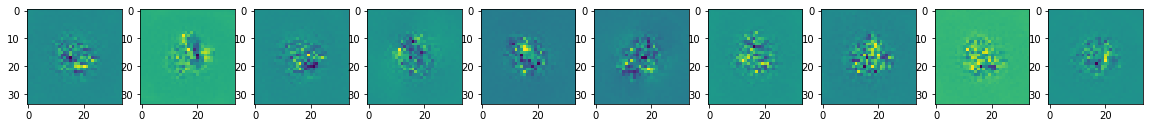

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.834067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.334000
[t-SNE] KL divergence after 1000 iterations: 0.340332
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([751.2769, 608.5544, 712.4199, 821.0898, 591.9193],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


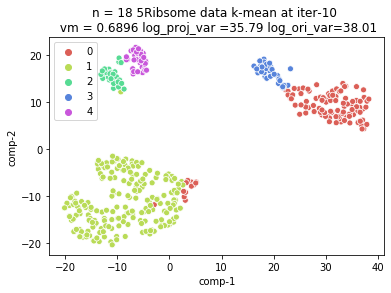

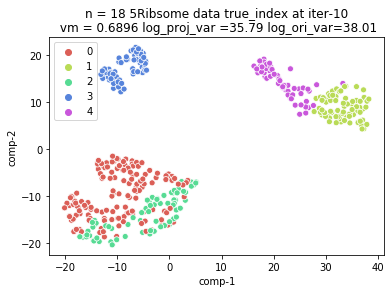

the 0 th iter, ratio = 0.1
output_collection 0-th batch


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.834067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.469879
[t-SNE] KL divergence after 1000 iterations: 0.346698
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([751.2769, 608.5545, 712.4199, 821.0899, 591.9194],
       grad_fn=<DivBackward0>)


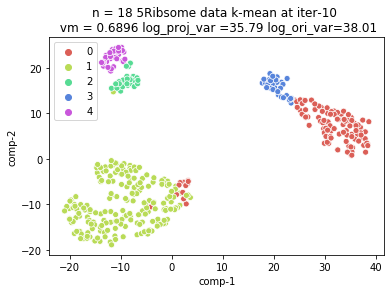

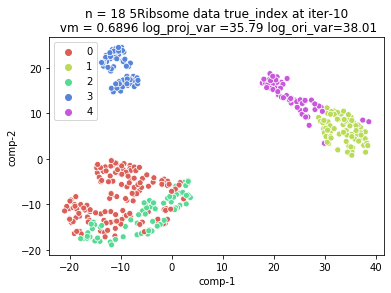

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1062.9549713134766 sec
1 batch 1 iteration
generated


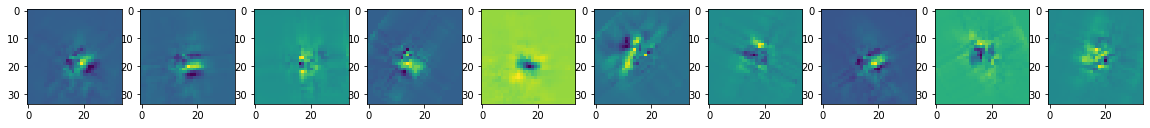

real


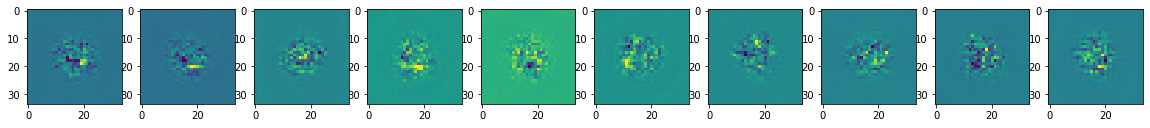

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 5.837078
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.037140
[t-SNE] KL divergence after 1000 iterations: 0.322237
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([664.7156, 531.5109, 631.0507, 724.6351, 516.9732],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


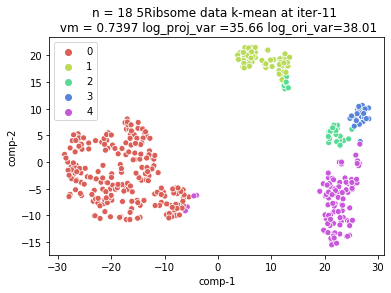

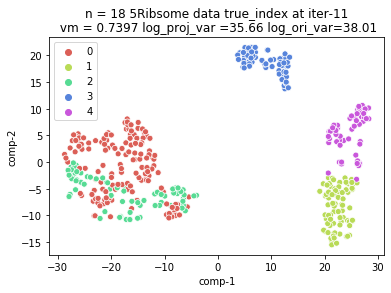

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1111.8848876953125 sec
1 batch 2 iteration
generated


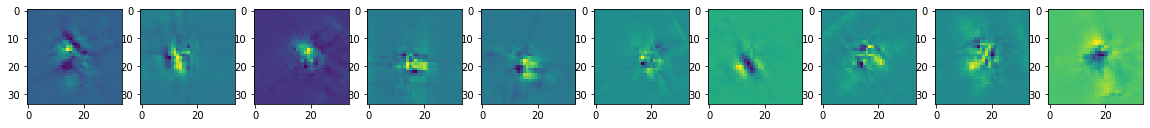

real


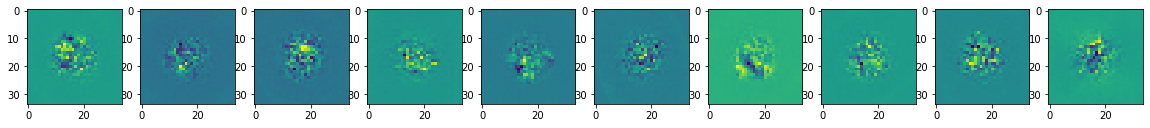

1120.368008852005 sec
1 batch 3 iteration
generated


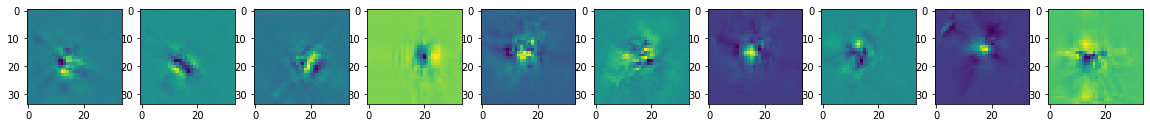

real


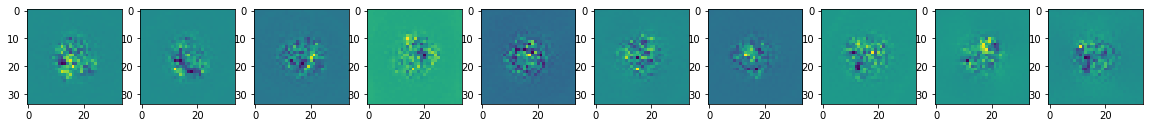

1218.2194247245789 sec
1 batch 4 iteration
generated


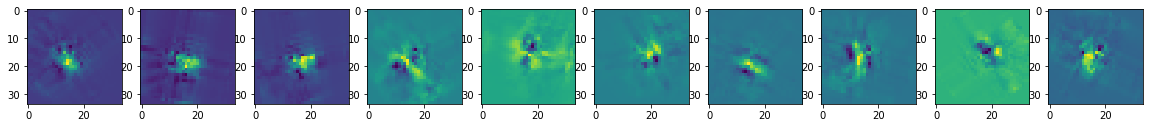

real


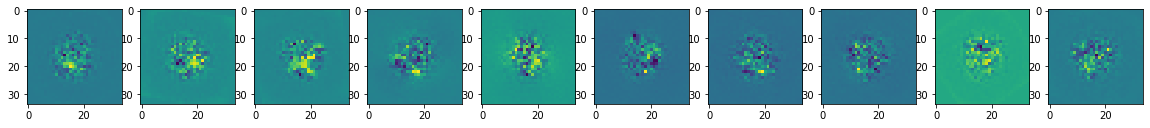

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.007s...
[t-SNE] Computed neighbors for 400 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 6.259531
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.592083
[t-SNE] KL divergence after 1000 iterations: 0.339997
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:567: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


 tensor([428.8951, 329.7236, 404.7433, 472.8551, 318.7157],
       grad_fn=<DivBackward0>)


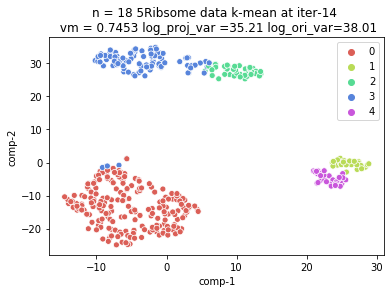

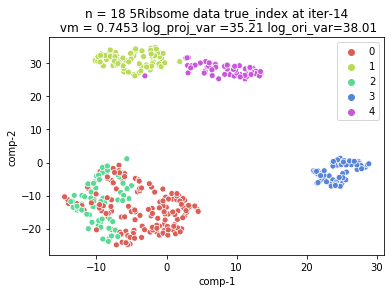

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1123.2788054943085 sec
1 batch 5 iteration
generated


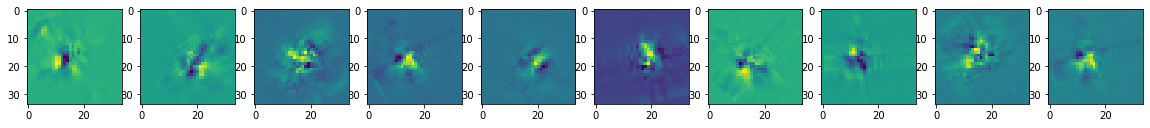

real


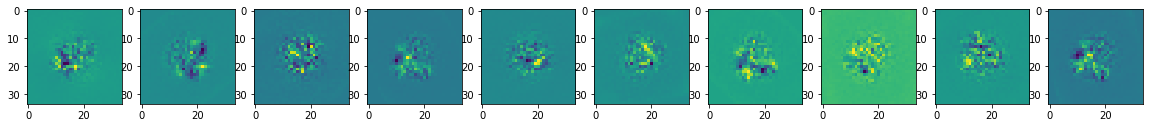

1159.1908249855042 sec
1 batch 6 iteration
generated


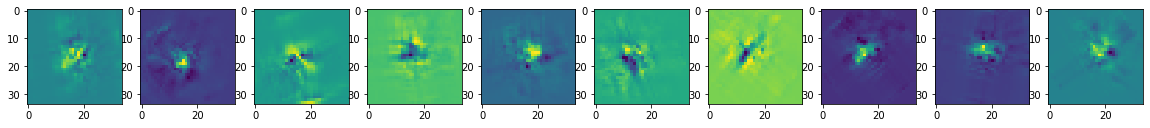

real


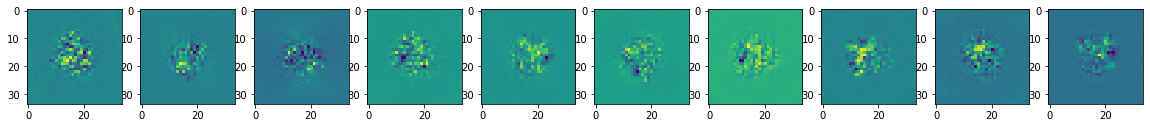

In [ ]:
from models import EM_2SDR

n = 18
b = 400
niter = 10
Images = new_projection
print(Images.shape)
import torch
exp_name = f'20220316_{data_name}_EM_2SDR_n_{n}_18_is_trained'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)

MP3.fit(0.1, True)

In [ ]:
MP3.fit(0.1, True)

(9453, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:77: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1103.5530259609222 sec
0 batch 1 iteration
generated


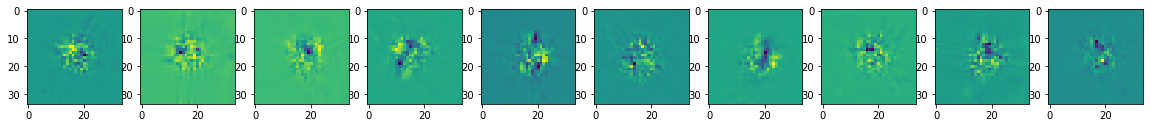

real


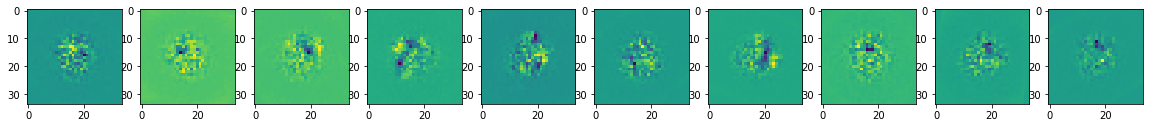

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.018s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 11.934457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.396965
[t-SNE] KL divergence after 1000 iterations: 0.205790
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:566: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/torch/csrc/utils/tensor_new.cpp:201.)
  ms_strucs = torch.tensor(ms_strucs)
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([714.4237, 553.2574, 673.7886, 766.3495, 527.7143],
       grad_fn=<DivBackward0>)


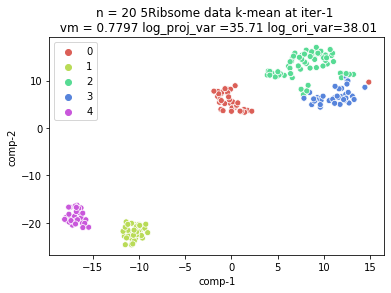

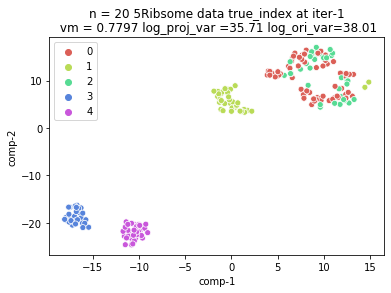

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1084.5248878002167 sec
0 batch 2 iteration
generated


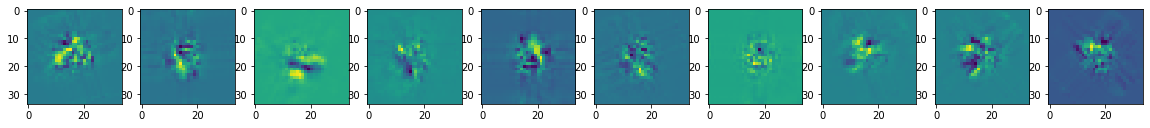

real


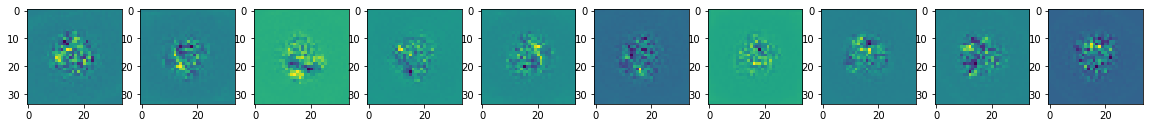

1078.1245155334473 sec
0 batch 3 iteration
generated


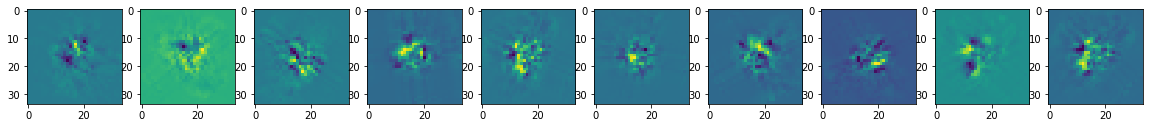

real


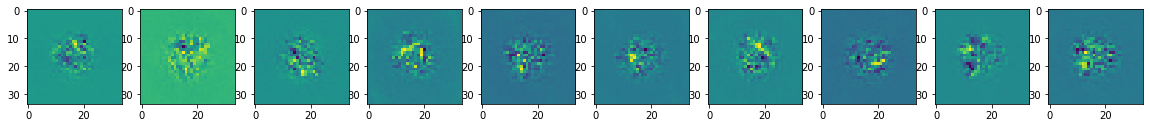

1064.7174711227417 sec
0 batch 4 iteration
generated


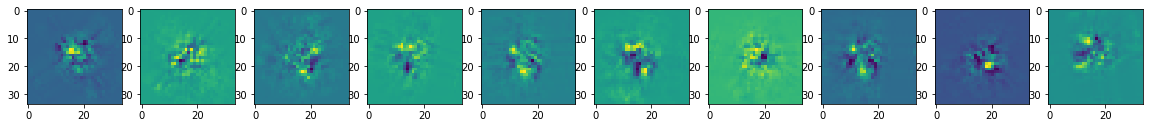

real


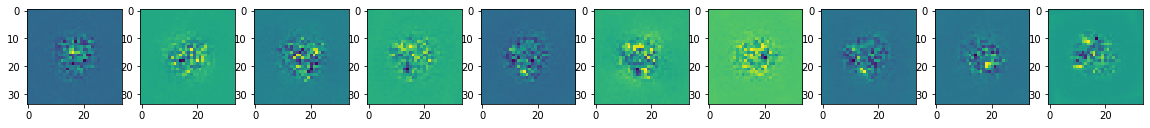

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 10.383220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.228661
[t-SNE] KL divergence after 1000 iterations: 0.224337
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([469.7653, 359.8410, 435.9391, 510.7867, 336.6794],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


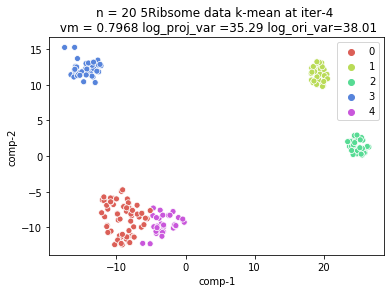

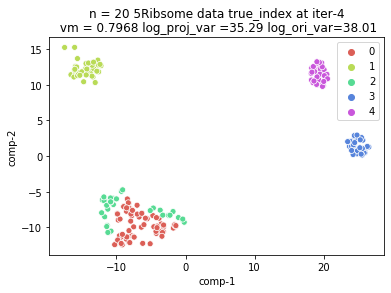

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1096.3520095348358 sec
0 batch 5 iteration
generated


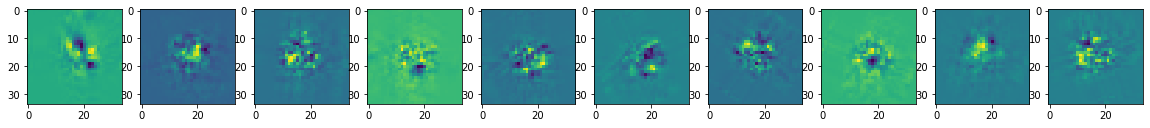

real


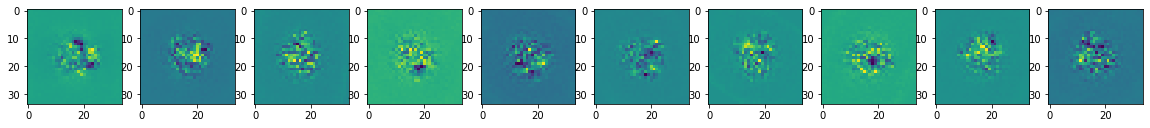

the 0 th iter, ratio = 0.1
output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 10.403692
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.712227
[t-SNE] KL divergence after 1000 iterations: 0.202295
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([510.2933, 403.7429, 475.5215, 559.1612, 385.9935],
       grad_fn=<DivBackward0>)


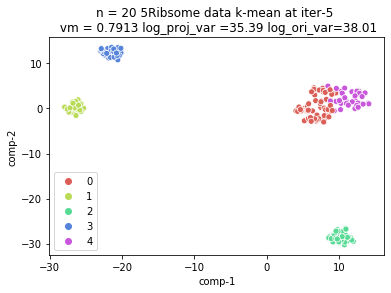

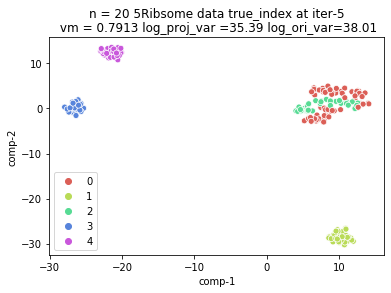

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1081.3877897262573 sec
1 batch 1 iteration
generated


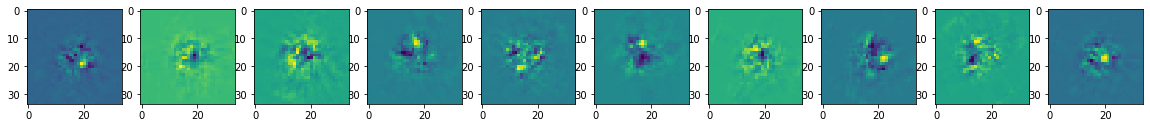

real


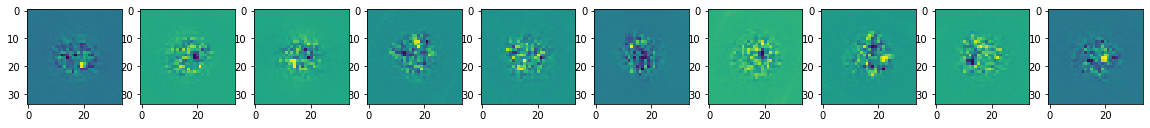

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 13.607535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.619793
[t-SNE] KL divergence after 1000 iterations: 0.202059
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([400.2938, 308.5305, 372.5712, 439.3182, 293.6266],
       grad_fn=<DivBackward0>)


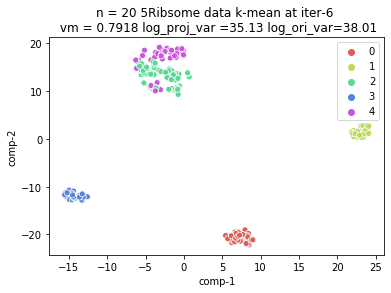

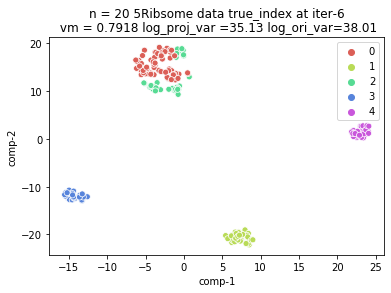

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1063.3280637264252 sec
1 batch 2 iteration
generated


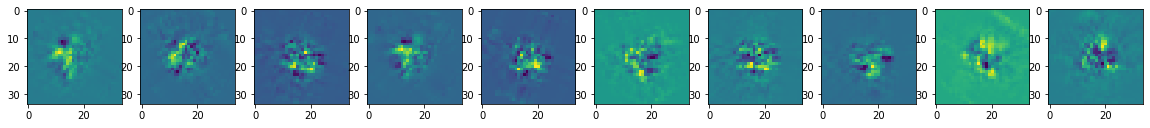

real


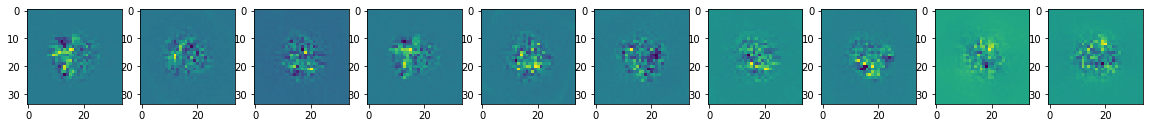

1084.9452259540558 sec
1 batch 3 iteration
generated


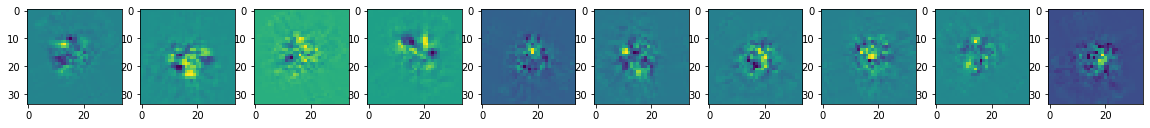

real


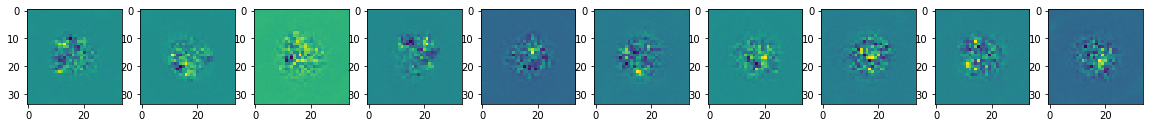

1067.2648737430573 sec
1 batch 4 iteration
generated


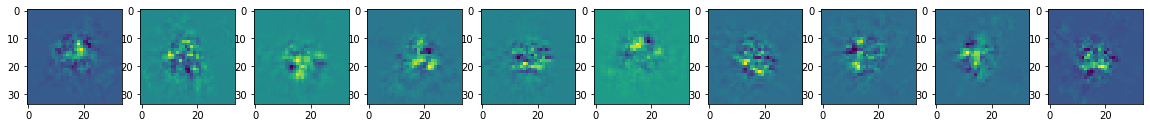

real


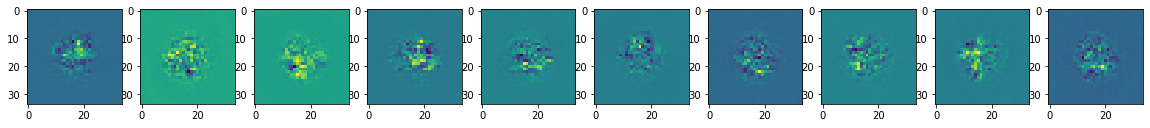

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 11.310166
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.871773
[t-SNE] KL divergence after 1000 iterations: 0.221749
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([374.2545, 295.6995, 347.0364, 409.9143, 279.1329],
       grad_fn=<DivBackward0>)


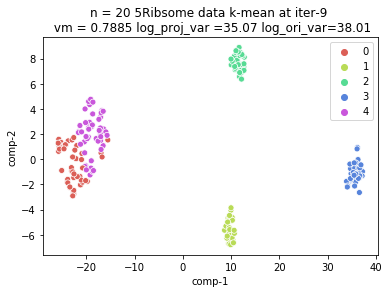

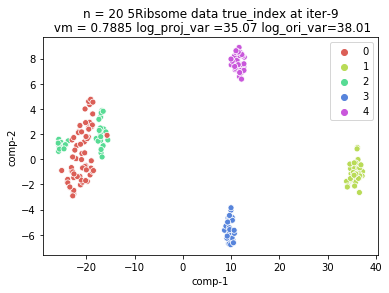

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1088.519914150238 sec
1 batch 5 iteration
generated


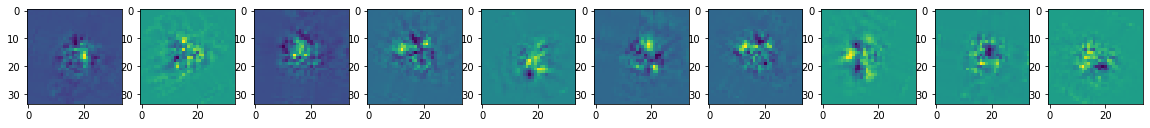

real


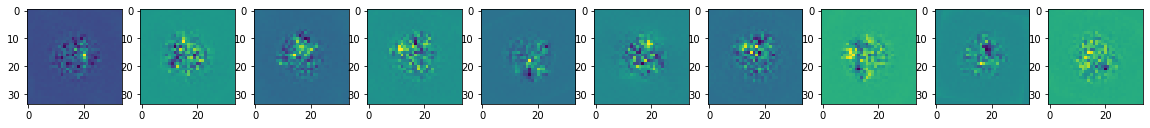

the 1 th iter, ratio = 0.1
output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 13.641693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.207233
[t-SNE] KL divergence after 1000 iterations: 0.183704
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([350.8472, 271.5577, 325.0024, 386.7500, 257.5759],
       grad_fn=<DivBackward0>)


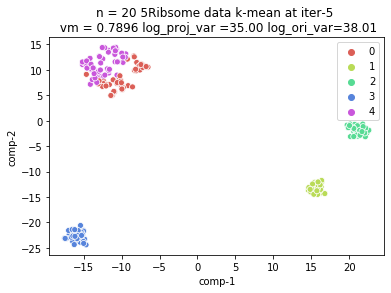

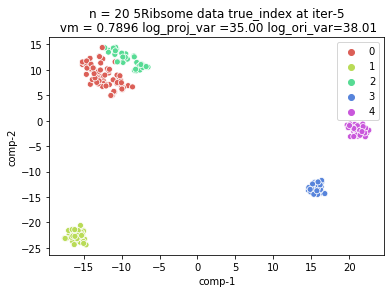

In [4]:
from models import EM_2SDR

n = 20
b = 200
niter = 5
Images = new_projection
print(Images.shape)
import torch
exp_name = f'20220319_{data_name}_EM_2SDR_n_{n}_18_is_trained'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
U1 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U1.pt')
U2 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U2.pt')
U3 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U3.pt')
MP3.U1.data[:, :18] = U1.detach()
MP3.U2.data[:, :18] = U2.detach()
MP3.U3.data[:, :18] = U3.detach()
MP3.fit(0.1, True)

1110.9039869308472 sec
0 batch 1 iteration
generated


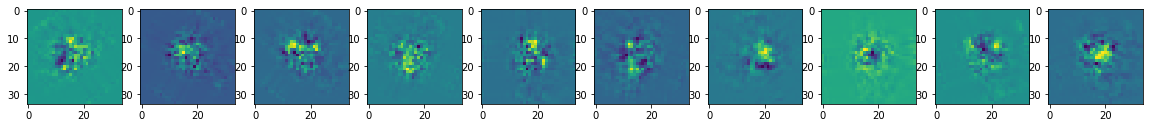

real


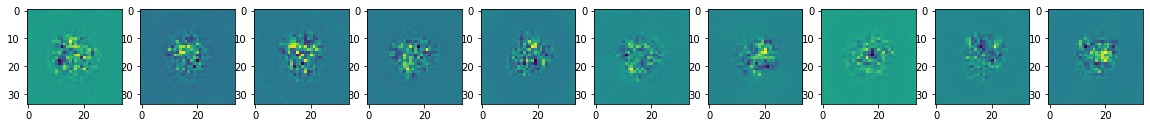

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 18.693327
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.176304
[t-SNE] KL divergence after 1000 iterations: 0.153873
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([363.5864, 283.0061, 336.7541, 400.5107, 268.1831],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


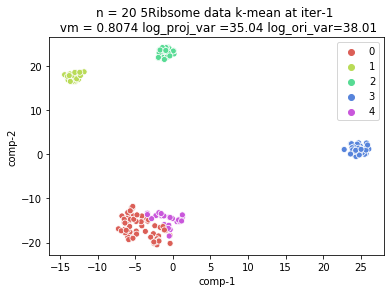

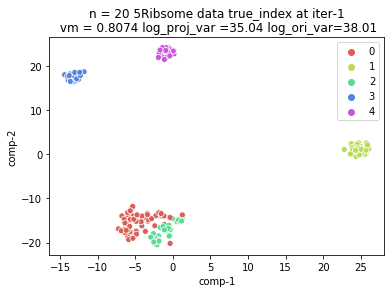

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1110.7496130466461 sec
0 batch 2 iteration
generated


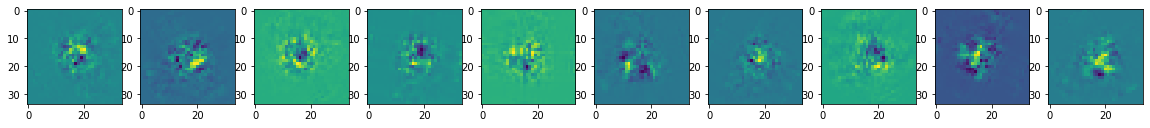

real


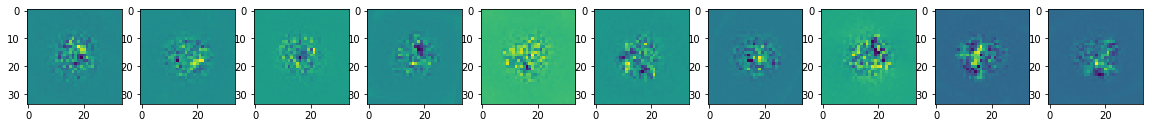

1093.021276473999 sec
0 batch 3 iteration
generated


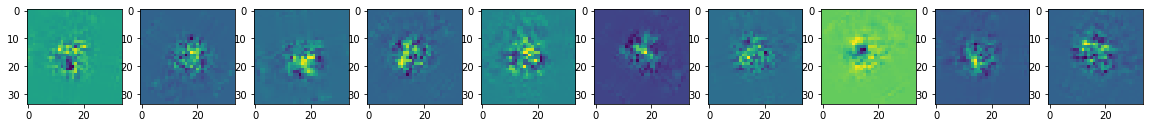

real


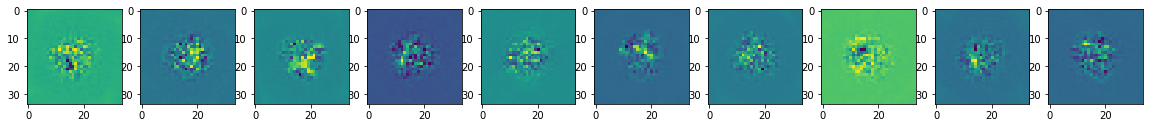

1104.9165613651276 sec
0 batch 4 iteration
generated


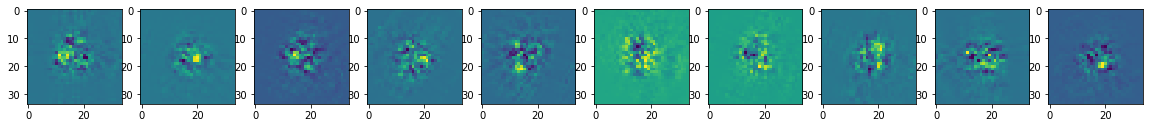

real


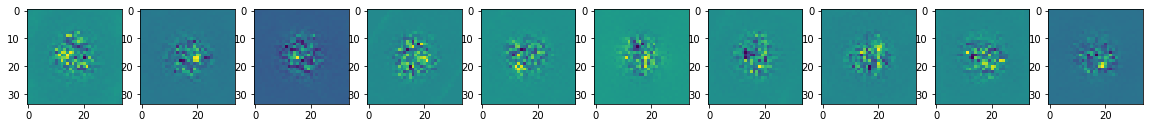

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 8.861906
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.402287
[t-SNE] KL divergence after 1000 iterations: 0.195724
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([349.8403, 270.8610, 324.0718, 385.0115, 256.5937],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


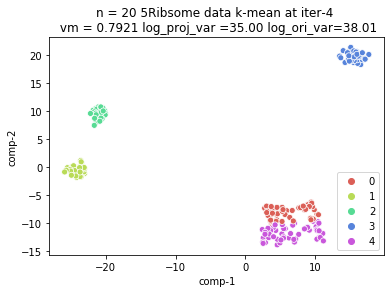

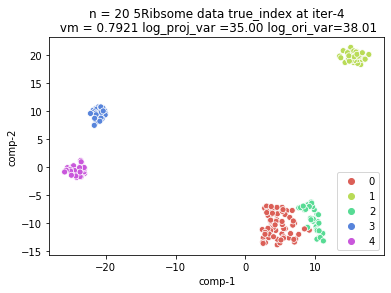

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1114.3030083179474 sec
0 batch 5 iteration
generated


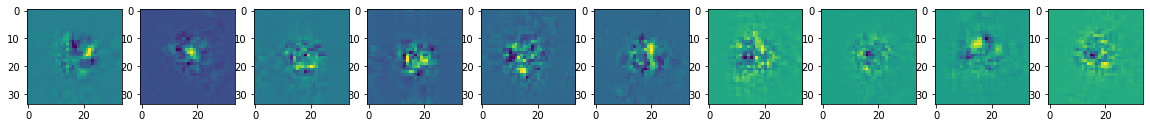

real


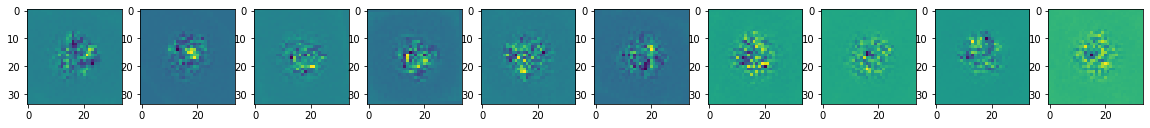

the 0 th iter, ratio = 0.01
output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 11.333569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.869919
[t-SNE] KL divergence after 1000 iterations: 0.218368
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([356.7824, 277.2748, 330.7260, 392.0714, 262.6304],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


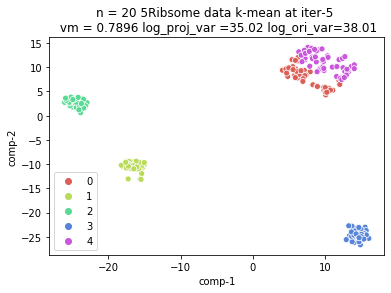

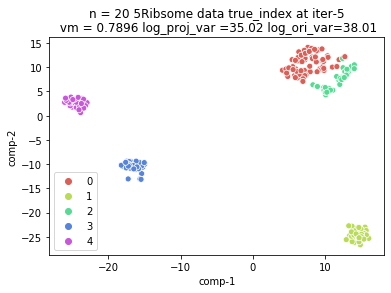

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1090.5371809005737 sec
1 batch 1 iteration
generated


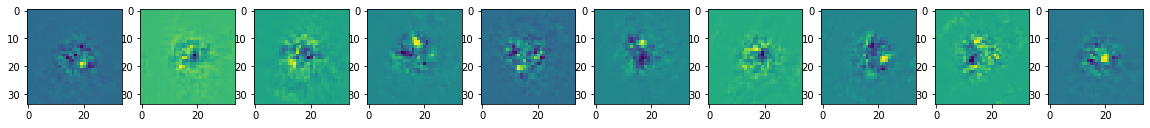

real


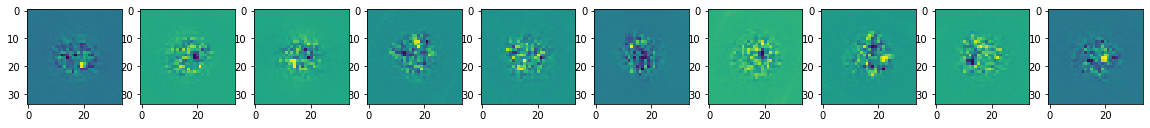

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 20.046999
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.312725
[t-SNE] KL divergence after 1000 iterations: 0.140709
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([344.6299, 266.6847, 319.7400, 378.2613, 252.5713],
       grad_fn=<DivBackward0>)


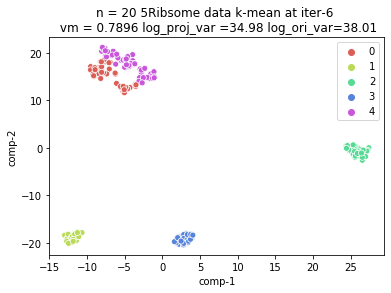

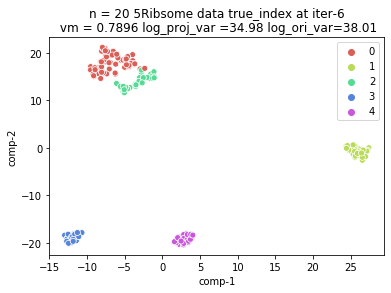

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1122.5303525924683 sec
1 batch 2 iteration
generated


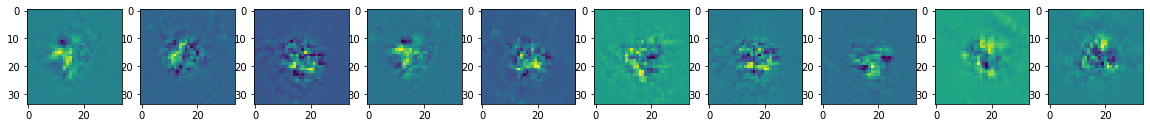

real


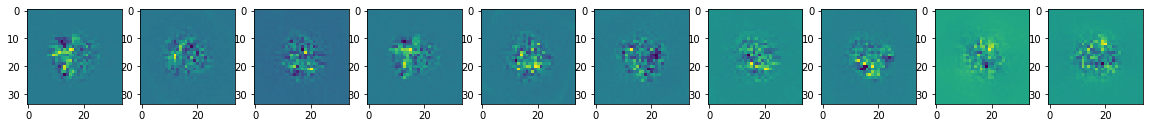

1107.7488510608673 sec
1 batch 3 iteration
generated


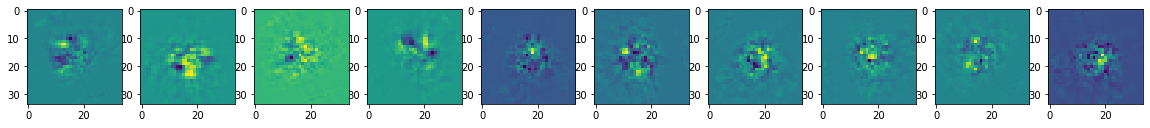

real


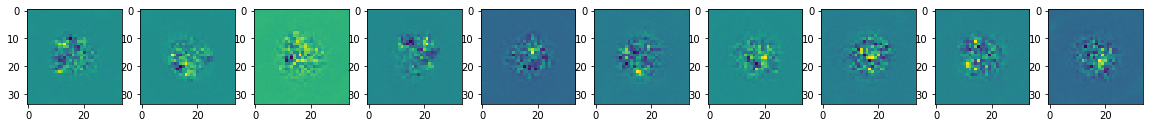

1097.3930406570435 sec
1 batch 4 iteration
generated


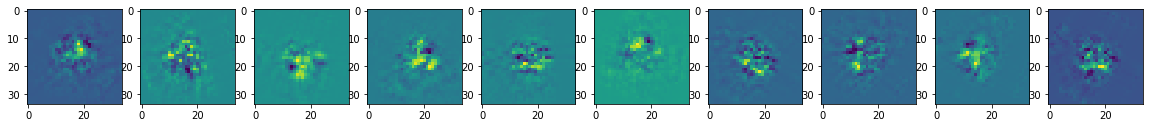

real


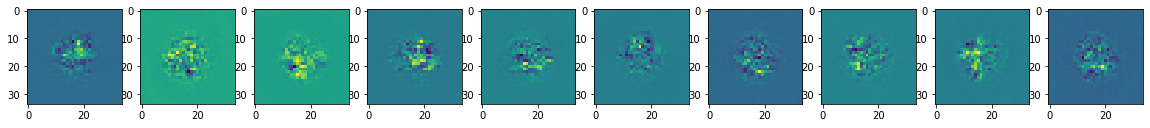

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 7.569968
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.556816
[t-SNE] KL divergence after 1000 iterations: 0.203281
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([338.0565, 262.0118, 313.1490, 372.1503, 248.2349],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


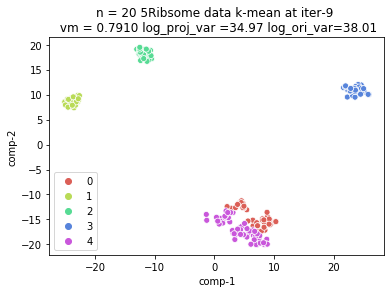

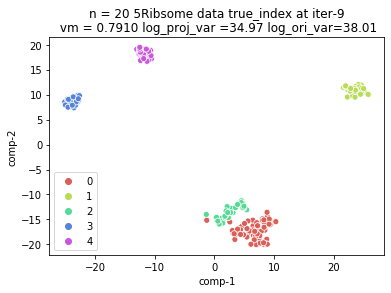

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [6]:
MP3.exp_name = exp_name + '2_train'
MP3.fit(0.01, True)

(9453, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:77: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1124.4848244190216 sec
0 batch 1 iteration
generated


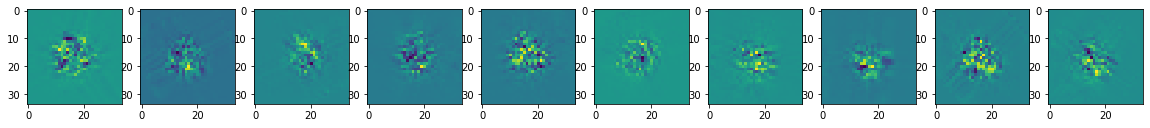

real


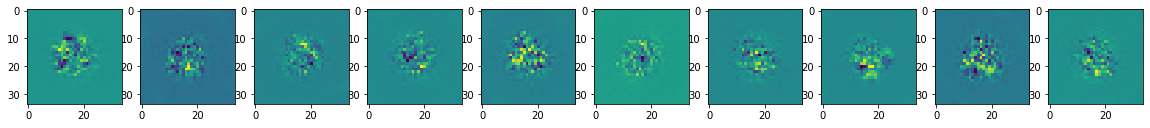

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.059s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 11.391062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.387093
[t-SNE] KL divergence after 1000 iterations: 0.203281
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:566: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/torch/csrc/utils/tensor_new.cpp:201.)
  ms_strucs = torch.tensor(ms_strucs)
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([654.5035, 489.8950, 620.0887, 701.4412, 471.2274],
       grad_fn=<DivBackward0>)


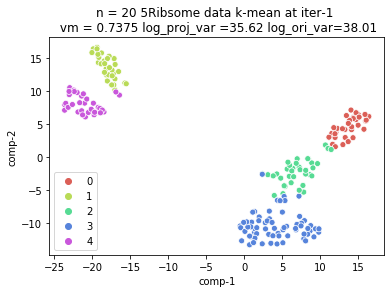

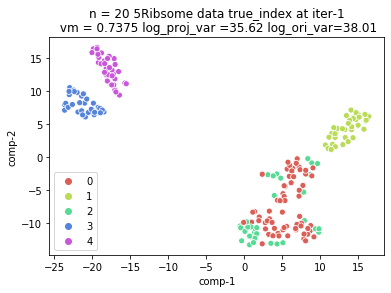

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1094.8612537384033 sec
0 batch 2 iteration
generated


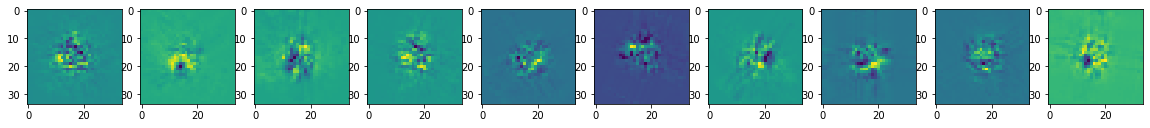

real


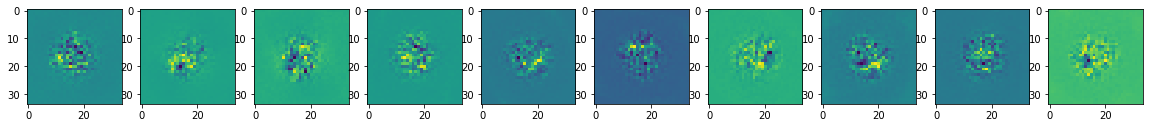

1105.923423051834 sec
0 batch 3 iteration
generated


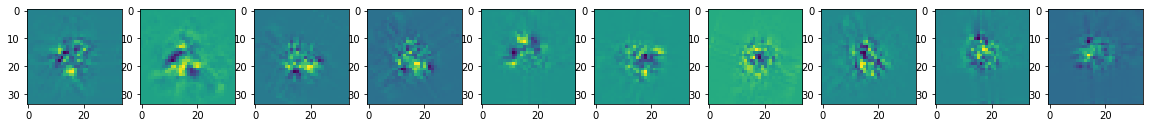

real


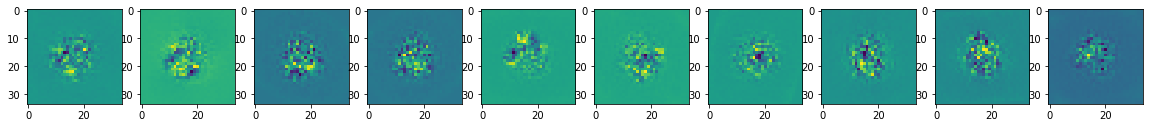

1086.170844078064 sec
0 batch 4 iteration
generated


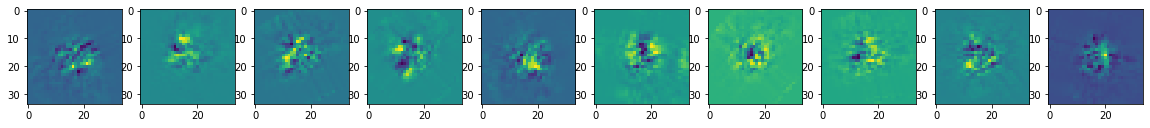

real


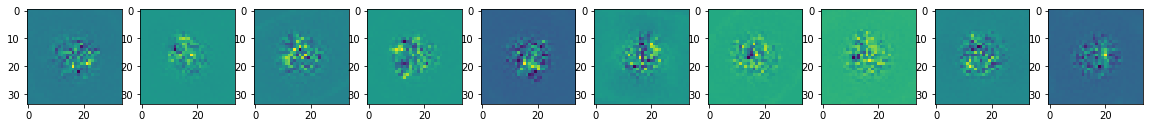

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 20.087496
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.963753
[t-SNE] KL divergence after 1000 iterations: 0.154754
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([431.0776, 323.8604, 399.8701, 472.7721, 306.7216],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


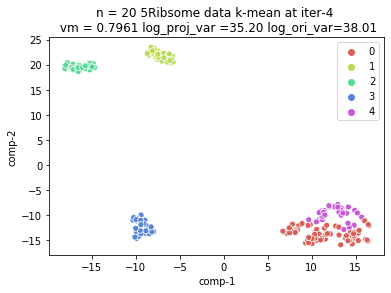

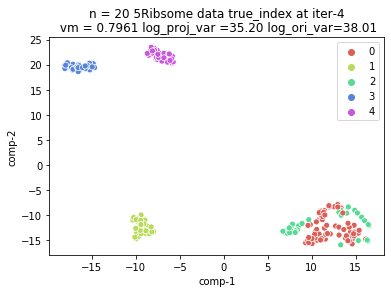

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1069.7972874641418 sec
0 batch 5 iteration
generated


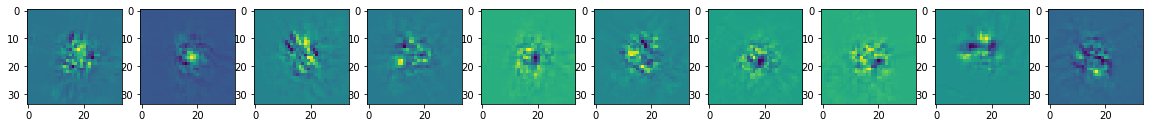

real


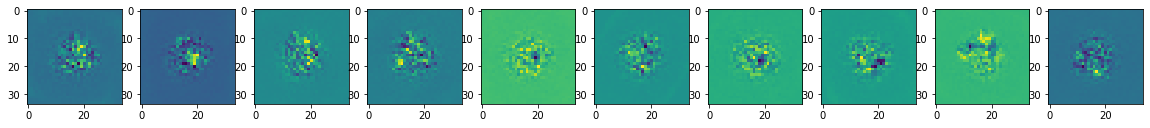

the 0 th iter, ratio = 0.1
output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 13.791215
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.189434
[t-SNE] KL divergence after 1000 iterations: 0.164561
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([335.1695, 255.3887, 310.0684, 367.6937, 241.8267],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


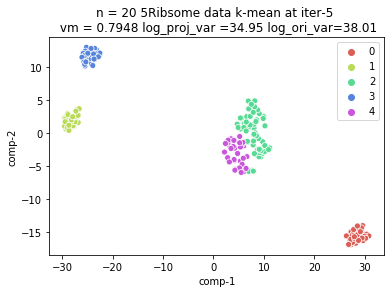

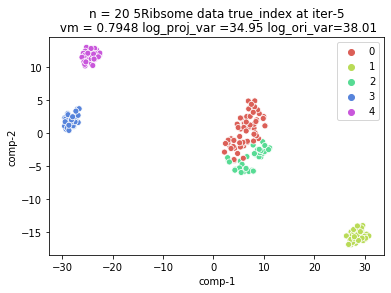

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [4]:
from models import EM_2SDR

n = 20
b = 200
niter = 5
Images = new_projection
print(Images.shape)
import torch
exp_name = f'20220320_{data_name}_EM_2SDR_n_{n}_18_is_trained'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
U1 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U1.pt')
U2 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U2.pt')
U3 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U3.pt')
MP3.U1.data[:, :18] = U1.detach()
MP3.U2.data[:, :18] = U2.detach()
MP3.U3.data[:, :18] = U3.detach()
MP3.fit(0.1, True)

1093.505752325058 sec
0 batch 1 iteration
generated


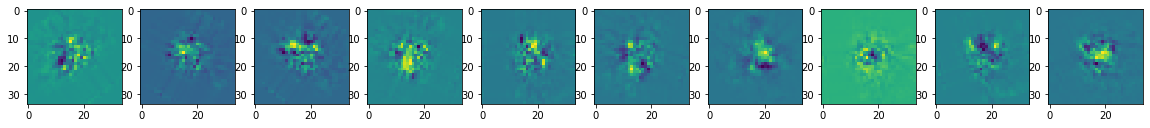

real


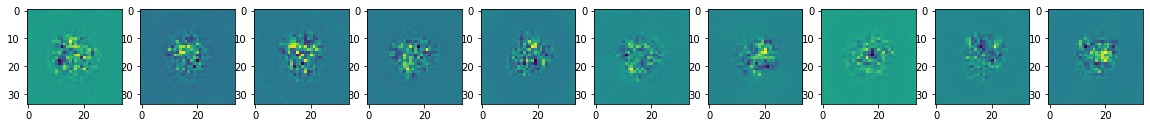

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 19.481888
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.222595
[t-SNE] KL divergence after 1000 iterations: 0.153090
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([345.9056, 263.6079, 320.2546, 379.7495, 249.9318],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


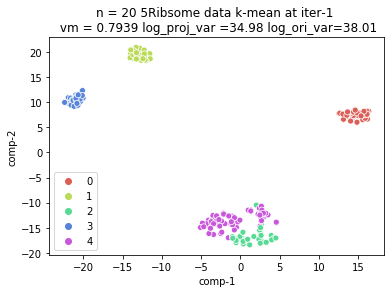

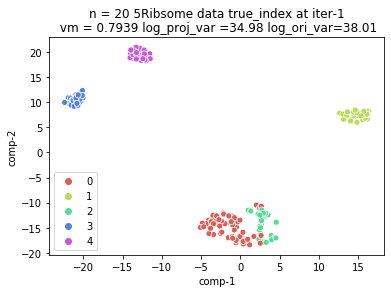

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [5]:
MP3.exp_name = exp_name + '2_train'
MP3.fit(0.01, True)

In [ ]:
MP3.Draw_Kmean_tsne('finish',num_batch = 47)

In [4]:
from models import EM_2SDR

n = 20
b = 200
niter = 2
Images = new_projection
print(Images.shape)
import torch
exp_name = f'20220320_{data_name}_EM_2SDR_n_{n}_18_is_trained'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
U1 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U1.pt')
U2 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U2.pt')
U3 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U3.pt')
MP3.U1.data[:, :18] = U1.detach()
MP3.U2.data[:, :18] = U2.detach()
MP3.U3.data[:, :18] = U3.detach()


(9453, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:77: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1093.4303028583527 sec
0 batch 1 iteration
generated


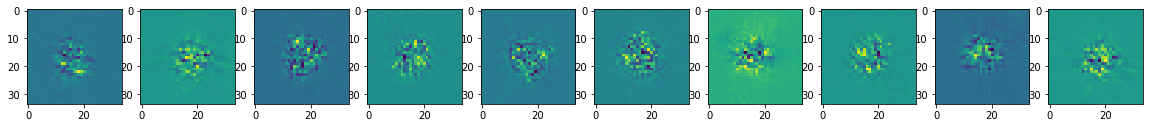

real


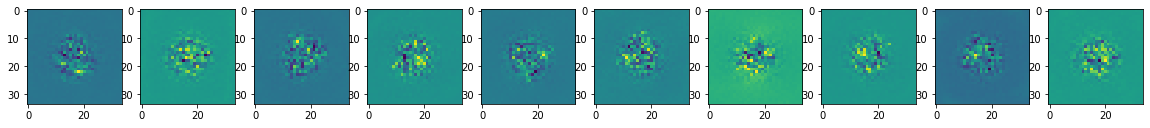

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 21.760839
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.735180
[t-SNE] KL divergence after 1000 iterations: 0.191894
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:566: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/torch/csrc/utils/tensor_new.cpp:201.)
  ms_strucs = torch.tensor(ms_strucs)
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([630.2203, 475.0549, 594.8829, 673.9000, 452.9946],
       grad_fn=<DivBackward0>)


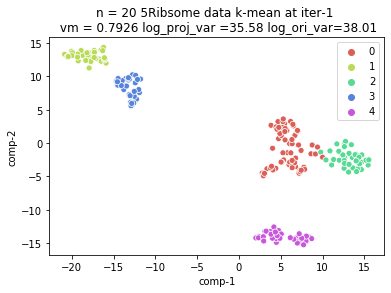

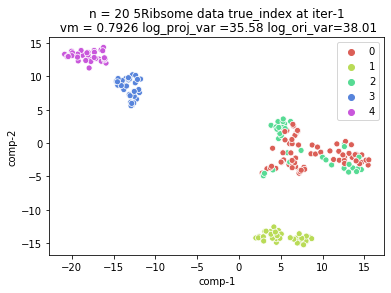

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1085.9913456439972 sec
0 batch 2 iteration
generated


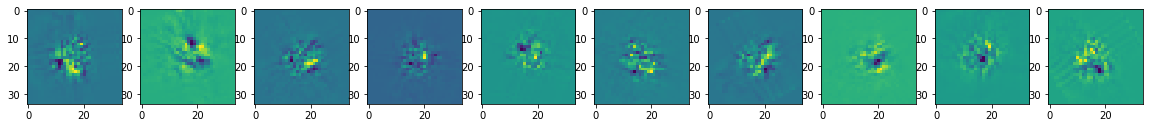

real


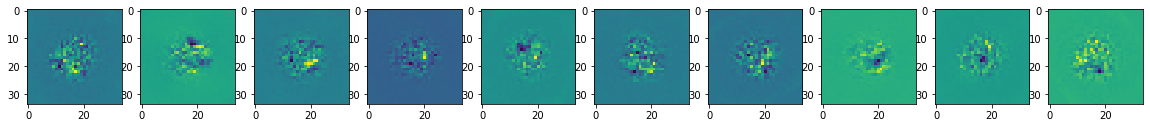

the 0 th iter, ratio = 0.1
output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 9.128749
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.611469
[t-SNE] KL divergence after 1000 iterations: 0.184155
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([527.2563, 400.4682, 489.6614, 571.8971, 374.3687],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


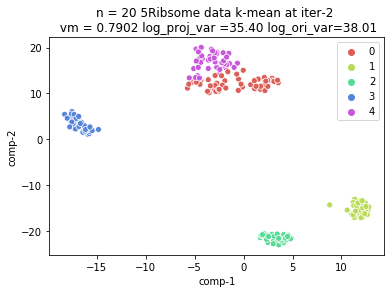

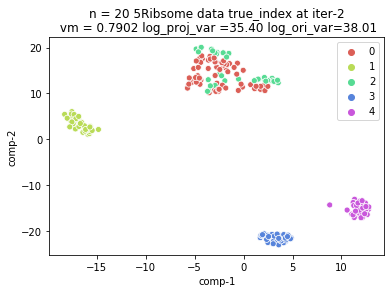

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1080.4691298007965 sec
1 batch 1 iteration
generated


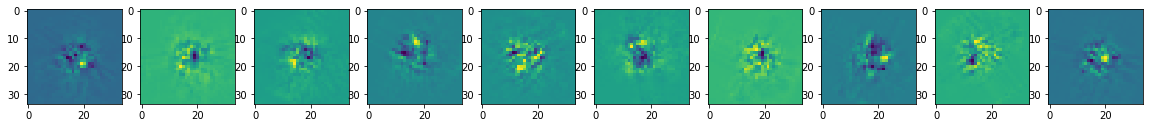

real


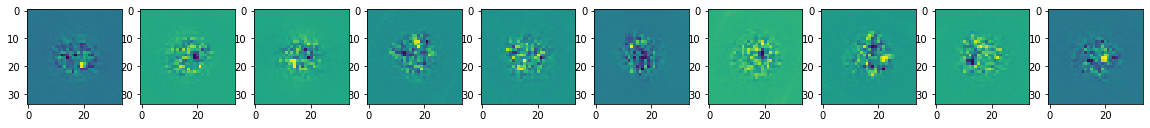

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 10.221109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.038105
[t-SNE] KL divergence after 1000 iterations: 0.214190
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([439.1546, 327.2160, 407.2901, 476.4894, 304.6127],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


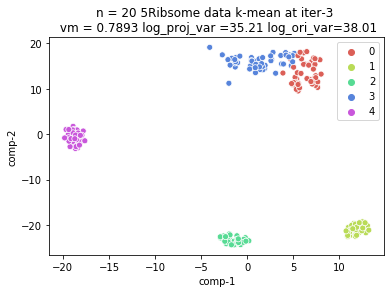

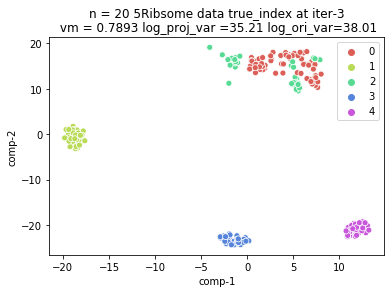

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1073.8418350219727 sec
1 batch 2 iteration
generated


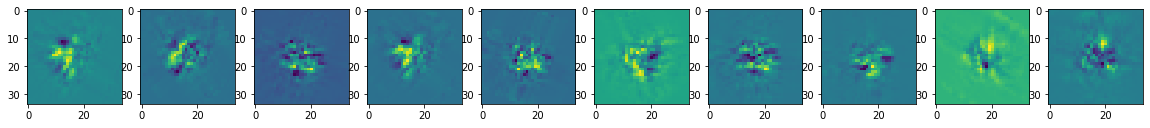

real


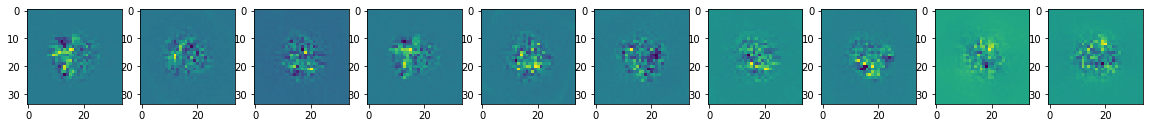

the 1 th iter, ratio = 0.1
output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 8.989746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.501213
[t-SNE] KL divergence after 1000 iterations: 0.153276
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([442.3404, 337.4362, 412.1019, 481.2459, 319.5832],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


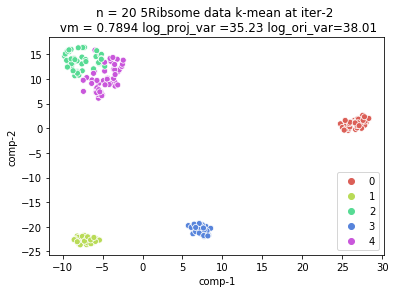

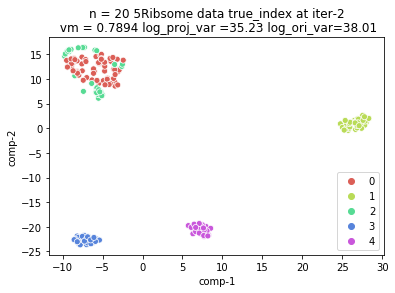

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1084.6935896873474 sec
0 batch 1 iteration
generated


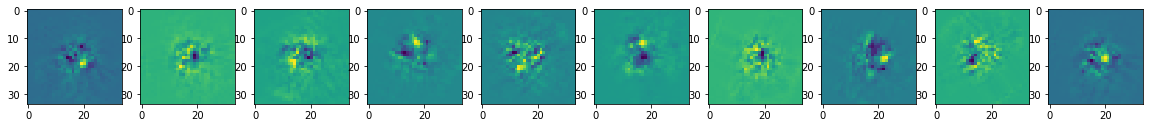

real


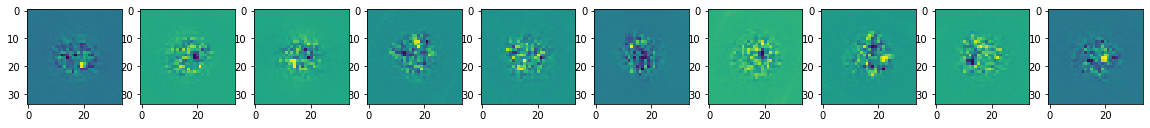

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 10.768164
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.756149
[t-SNE] KL divergence after 1000 iterations: 0.178070
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([441.3890, 335.7644, 412.3816, 477.9506, 317.9748],
       grad_fn=<DivBackward0>)


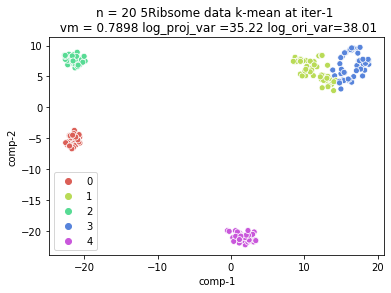

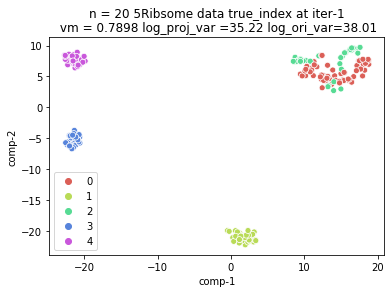

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [5]:
MP3.fit(0.1, True)
MP3.fit(0.01, True)

(9453, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:77: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1101.1153779029846 sec
0 batch 1 iteration
generated


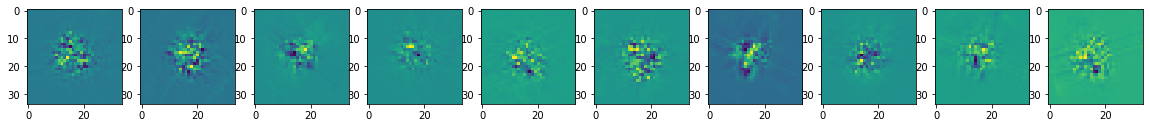

real


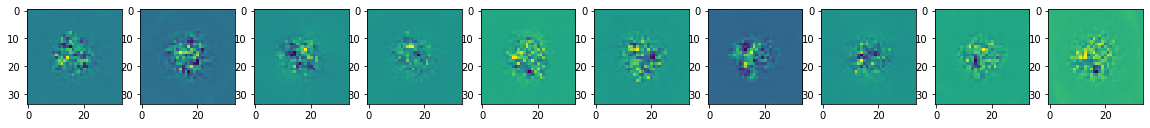

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.021s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 11.776137
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.150230
[t-SNE] KL divergence after 1000 iterations: 0.217850
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each 

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:566: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/torch/csrc/utils/tensor_new.cpp:201.)
  ms_strucs = torch.tensor(ms_strucs)
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([658.9732, 502.7066, 621.5814, 711.1311, 480.3890],
       grad_fn=<DivBackward0>)


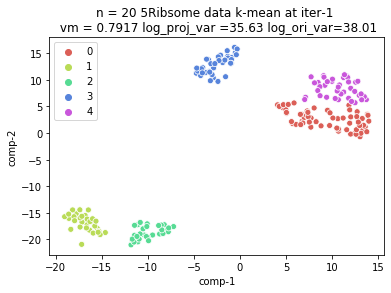

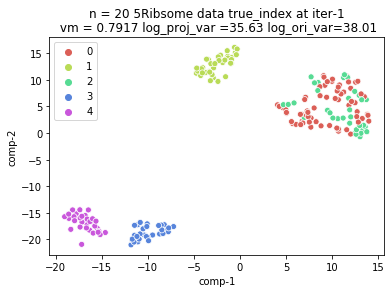

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1087.90261220932 sec
0 batch 2 iteration
generated


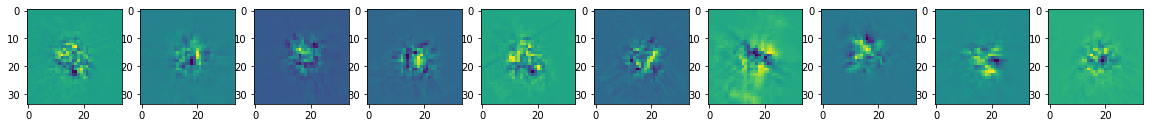

real


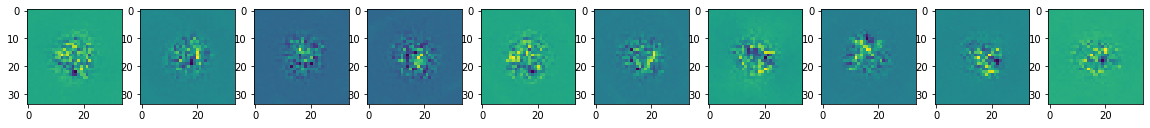

1087.2226660251617 sec
0 batch 3 iteration
generated


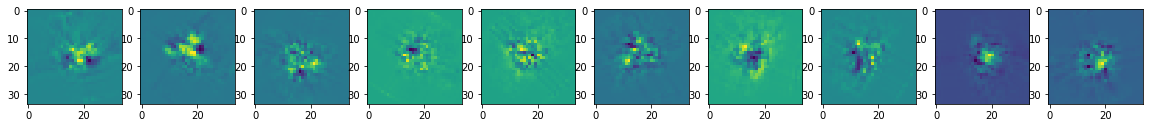

real


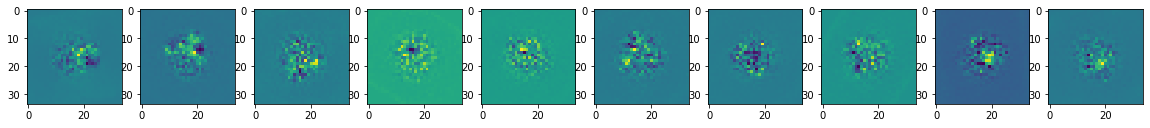

1087.1039283275604 sec
0 batch 4 iteration
generated


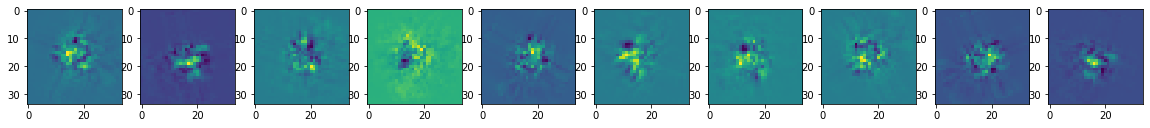

real


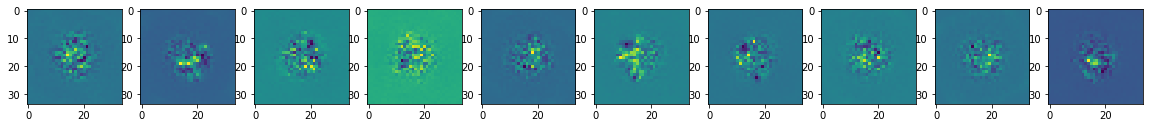

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 12.447584
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.037224
[t-SNE] KL divergence after 1000 iterations: 0.181909
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([470.2709, 359.1199, 436.1469, 513.4208, 335.6849],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


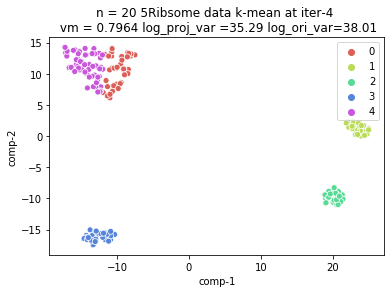

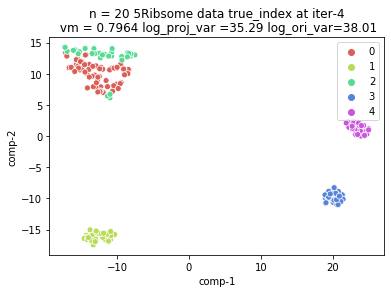

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1076.684238433838 sec
0 batch 5 iteration
generated


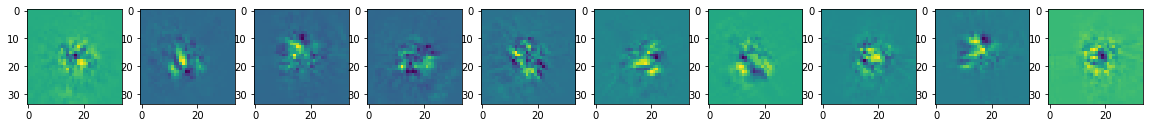

real


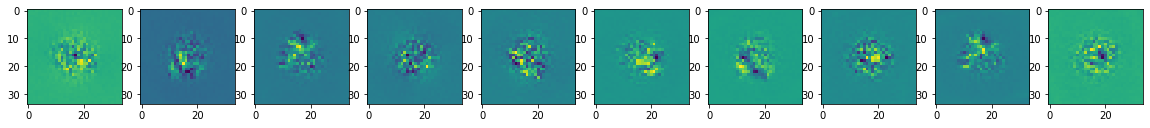

1116.4259417057037 sec
0 batch 6 iteration
generated


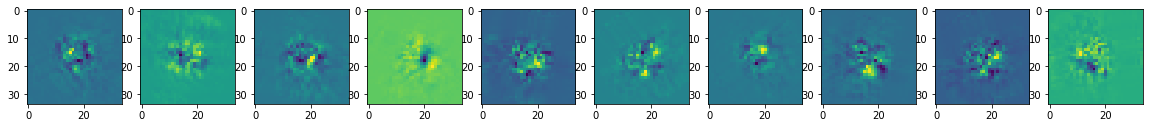

real


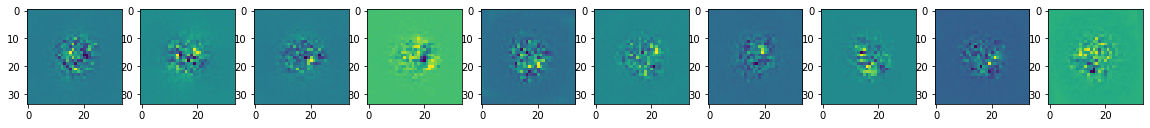

1082.6341030597687 sec
0 batch 7 iteration
generated


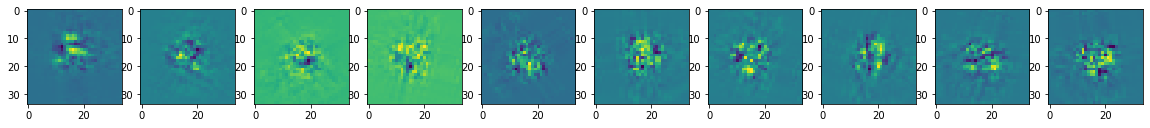

real


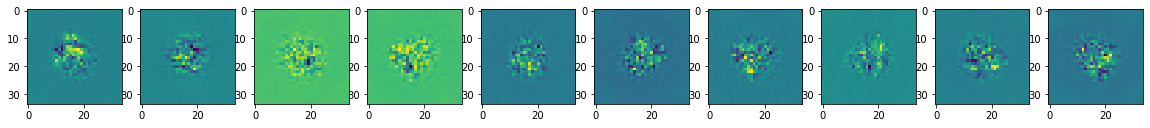

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 18.740260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.703266
[t-SNE] KL divergence after 1000 iterations: 0.169794
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([6597.6963, 6177.1406, 6434.3062, 6860.9253, 6098.1235])
self.projected_var_each tensor([298.0022, 225.8434, 276.3759, 326.5377, 212.8189],
       grad_fn=<DivBackward0>)


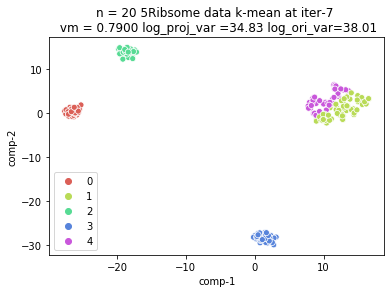

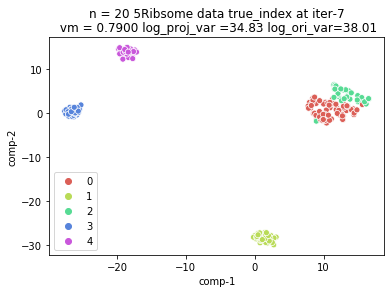

the 0 th iter, ratio = 0.1
output_collection 0-th batch


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


In [ ]:
from models import EM_2SDR

n = 20
b = 200
niter = 7
Images = new_projection
print(Images.shape)
import torch
exp_name = f'20220320_{data_name}_EM_2SDR_n_{n}_18_is_trained_2'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
U1 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U1.pt')
U2 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U2.pt')
U3 = torch.load('./snap_shot/20220220_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_18_3th_U3.pt')
MP3.U1.data[:, :18] = U1.detach()
MP3.U2.data[:, :18] = U2.detach()
MP3.U3.data[:, :18] = U3.detach()

import time 
start = time.time()
MP3.fit(0.1, True)
MP3.exp_name = exp_name + '2_train'
MP3.fit(0.01, True)
print(time.time()-start)
